In [179]:
"""
Assignment 5
Submit Assignment
A biometrics database contains height and handspan measurements collected from a large number of individuals.
 Presumably, that population consists of adult females, adult males and children. 
 The class labels have not been provided in the database. The database is attached.
1.	Use the Expectation Maximization algorithm to figure out the class (F, M, or C) of each sample. 
Note: You may use a module such as scikit-learn. You do not need to implement the algorithm from scratch
2.	Estimate the confidence of each prediction by computing the posterior probability
3.	Estimate the number of adult females, adult males and children in the population
Assignment_5_Data_and_Template.xlsx 

"""

'\nAssignment 5\nSubmit Assignment\nA biometrics database contains height and handspan measurements collected from a large number of individuals.\n Presumably, that population consists of adult females, adult males and children. \n The class labels have not been provided in the database. The database is attached.\n1.\tUse the Expectation Maximization algorithm to figure out the class (F, M, or C) of each sample. \nNote: You may use a module such as scikit-learn. You do not need to implement the algorithm from scratch\n2.\tEstimate the confidence of each prediction by computing the posterior probability\n3.\tEstimate the number of adult females, adult males and children in the population\nAssignment_5_Data_and_Template.xlsx \n\n'

0    258
dtype: int64


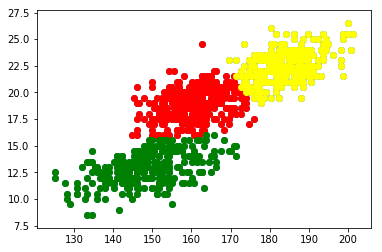

In [293]:
import numpy as np
from matplotlib import pyplot as plt

def getSheetNames(excelfile):
    from pandas import ExcelFile
    return (ExcelFile(excelfile)).sheet_names

def readExcelSheet1(excelfile):
    from pandas import read_excel
    return (read_excel(excelfile)).values

def readExcelRange(excelfile, sheetname="Sheet1", startrow=1, endrow=1, startcol=1, endcol=1):
    from pandas import read_excel
    values = (read_excel(excelfile, sheetname, header=None)).values;
    return values[startrow - 1:endrow, startcol - 1:endcol]

def readExcel(excelfile, **args):
    if args:
        data = readExcelRange(excelfile, **args)
    else:
        data = readExcelSheet1(excelfile)
    if data.shape == (1, 1):
        return data[0, 0]
    elif (data.shape)[0] == 1:
        return data[0]
    else:
        return data
def writeExcelData(x, excelfile, sheetname, startrow, startcol, reshape=None):
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    if reshape:
        df = DataFrame(x.reshape(-1, len(x)))
    else:
        df = DataFrame(x)
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine='openpyxl')
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name=sheetname, startrow=startrow - 1, startcol=startcol - 1, header=False, index=False)
    writer.save()
    writer.close()


excelfile = r"/Users/omerorhan/Desktop/UCSC/MachineLearning/Assignments/venv/notebookfiles/" \
            r"Assignment#5/Assignment_5_Data_and_Template.xlsx";
sheets = getSheetNames(excelfile)
sheets

dataset = readExcel(excelfile)

data = dataset
data[:, 0] = data[:, 0] * 2.54

plt.scatter(data[:, 0], data[:, 1])
gmm = GaussianMixture(n_components=3)

gmm.fit(data)

labels = gmm.predict(data)

labels = DataFrame(labels)
labels[labels == 0] = "C"
labels[labels == 1] = "M"
labels[labels == 2] = "F"
print(labels[labels == "M"].count())
writeExcelData(labels, excelfile, "Results", 2, 1)
writeExcelData([labels[labels == "M"].count()], excelfile, "Results", 2, 6)
writeExcelData([labels[labels == "F"].count()], excelfile, "Results", 3, 6)
writeExcelData([labels[labels == "C"].count()], excelfile, "Results", 4, 6)
d['labels'] = labels
d0 = d[d['labels'] == "C"]
d1 = d[d['labels'] == "M"]
d2 = d[d['labels'] == "F"]

# plot three clusters in same plot 
plt.scatter(d0[0], d0[1], c='r')
plt.scatter(d1[0], d1[1], c='yellow')
plt.scatter(d2[0], d2[1], c='g')


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


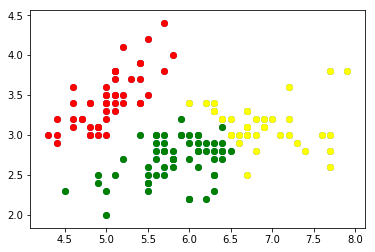

In [182]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn import datasets 
from sklearn.mixture import GaussianMixture 
  
# load the iris dataset 
iris = datasets.load_iris() 
  
# select first two columns  
X = iris.data[:, :2] 
  
# turn it into a dataframe 
d = pd.DataFrame(X) 

# plot the data 
plt.scatter(d[0], d[1]) 

gmm = GaussianMixture(n_components = 3) 
  
# Fit the GMM model for the dataset  
# which expresses the dataset as a  
# mixture of 3 Gaussian Distribution 
print(type(d))

gmm.fit(d) 
  
# Assign a label to each sample 
labels = gmm.predict(d) 
print(type(d))
d['labels']= labels 
d0 = d[d['labels']== 0] 
d1 = d[d['labels']== 1] 
d2 = d[d['labels']== 2] 
  
# plot three clusters in same plot 
plt.scatter(d0[0], d0[1], c ='r') 
plt.scatter(d1[0], d1[1], c ='yellow') 
plt.scatter(d2[0], d2[1], c ='g') 